In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/home/olle/PycharmProjects/orderbookrl


# First try

Reward is:


$ cap_t = cash_t + possession_t*ask_t $

$ r_t = (cap_t - cap_{t-1})/cap_t $

In [2]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/plotly/tools.py:102: UserWarning:

Looks like you don't have 'read-write' permission to your 'home' ('~') directory or to our '~/.plotly' directory. That means plotly's python api can't setup local configuration files. No problem though! You'll just have to sign-in using 'plotly.plotly.sign_in()'. For help with that: 'help(plotly.plotly.sign_in)'.
Questions? Visit https://support.plot.ly



In [3]:
agent_id = 'PPO'
path = 'logs/marketorderenv/ppo/PPO_MarketOrderEnv-v0_0_2018-08-25_00-34-43n03p09gt/'
checkpoint = 400

env, agent = load_env_agent(agent_id, path, checkpoint)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:45418 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:26520 to respond...
Starting local scheduler with the following resources: {'CPU': 4, 'GPU': 1}.

View the web UI at http://localhost:8890/notebooks/ray_ui56205.ipynb?token=d508505573bea393548f8a7c58a2961c01d3d0e9dd6ef867



Created LogSyncer for /home/olle/ray_results/2018-08-26_10-19-03o81qa76n -> None
Using custom preprocessor mv


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-03-24T21:22:02.975000Z
2018-03-25T07:35:54.951000Z
2018-03-25T16:21:55.635000Z
2018-03-26T00:58:20.316000Z
2018-03-26T11:25:41.812000Z
2018-03-26T17:59:51.289000Z
2018-03-26T22:04:35.027000Z
2018-03-27T02:09:40.391000Z
2018-03-27T08:26:18.416000Z
2018-03-27T17:28:54.487000Z
2018-03-28T01:28:57.128000Z
2018-03-28T12:27:46.419000Z
2018-03-28T23:10:43.552000Z
2018-03-29T07:11:55.860000Z
2018-03-29T12:29:50.187000Z
2018-03-29T17:47:12.560000Z
2018-03-29T22:10:45.379000Z
2018-03-30T01:09:07.318000Z
2018-03-30T05:15:59.463000Z
2018-03-30T08:46:10.426000Z
2018-03-30T12:19:36.813000Z
2018-03-30T16:30:55.313000Z
2018-03-30T20:50:40.660000Z
2018-03-31T02:10:18.360000Z
2018-03-31T09:39:26.353000Z
2018-03-31T14:47:36.075000Z
2018-03-31T23:29:42.377000Z
2018-04-01T07:10:29.860000Z
2018-04-01T13:06:35.909000Z
2018-04-01T16:34:43.204000Z
2018-04-01T20:58:46.961000Z
2018-04-02T04:11:30.498000Z
2018-04-02T13:27:02.129000Z
2018-04-02T20:59:27.100000Z
2018-04-03T05:30:48.439000Z
2018-04-03T14:31:01.

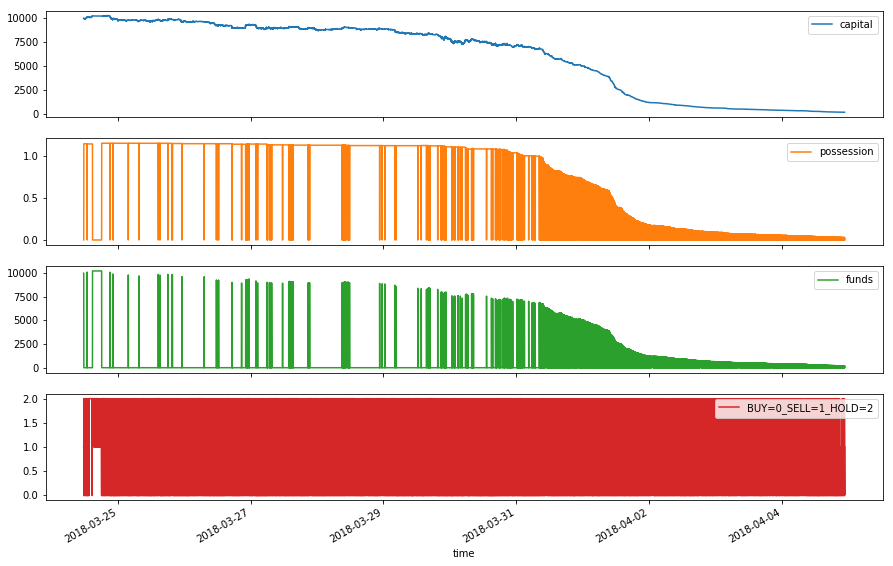

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

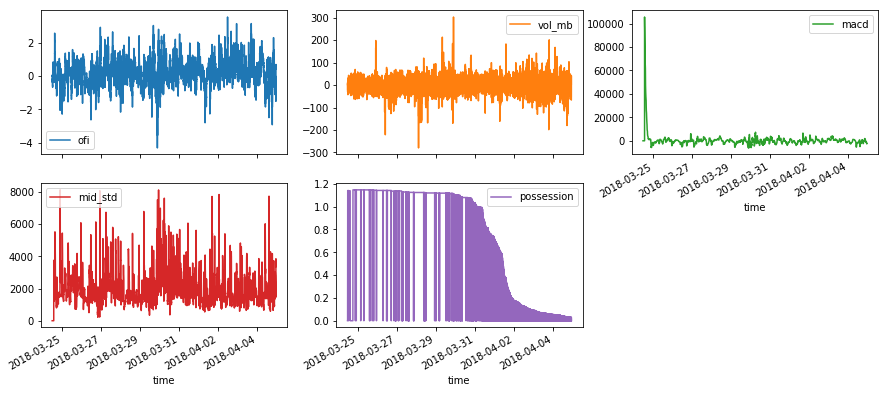

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession']
states.plot(subplots=True, figsize=(15,10), layout=layout);

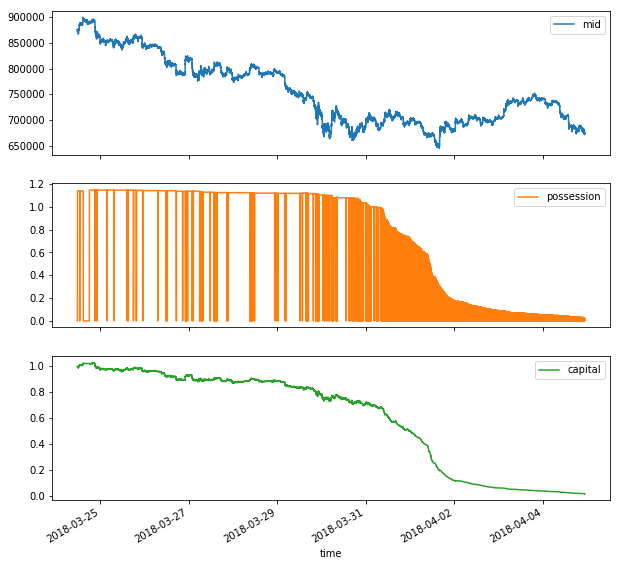

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

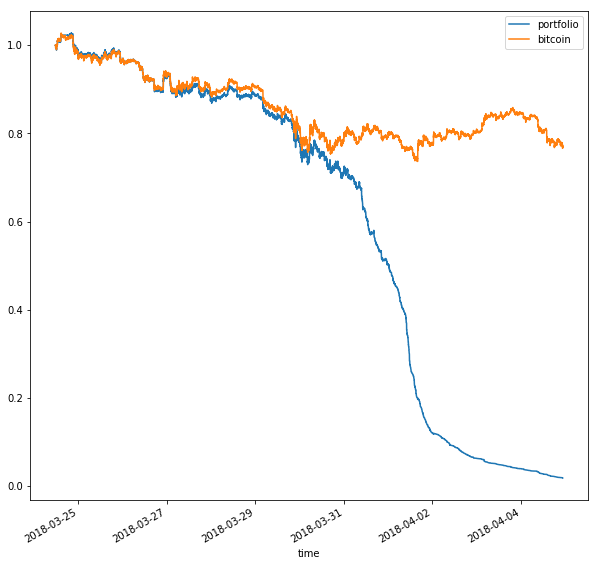

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

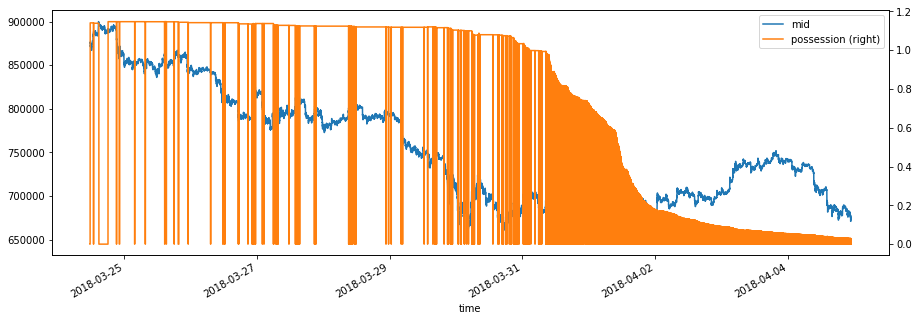

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

# Comment

The agent pushes down its capital buy constantly buying and selling and loosing on the spread. It is easier to increase percentage of capital with a lower capital.